<a href="https://colab.research.google.com/github/Varij-Saini/Final-Project-ML/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving stroke-data.csv to stroke-data.csv


In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['stroke-data.csv']))
dataset.drop('id', inplace=True, axis=1)

In [ ]:
print(dataset)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smok

In [ ]:
# fill missing values of BMI with mean 
bmi_mean=dataset['bmi'].mean()
dataset['bmi']=dataset['bmi'].fillna(bmi_mean)


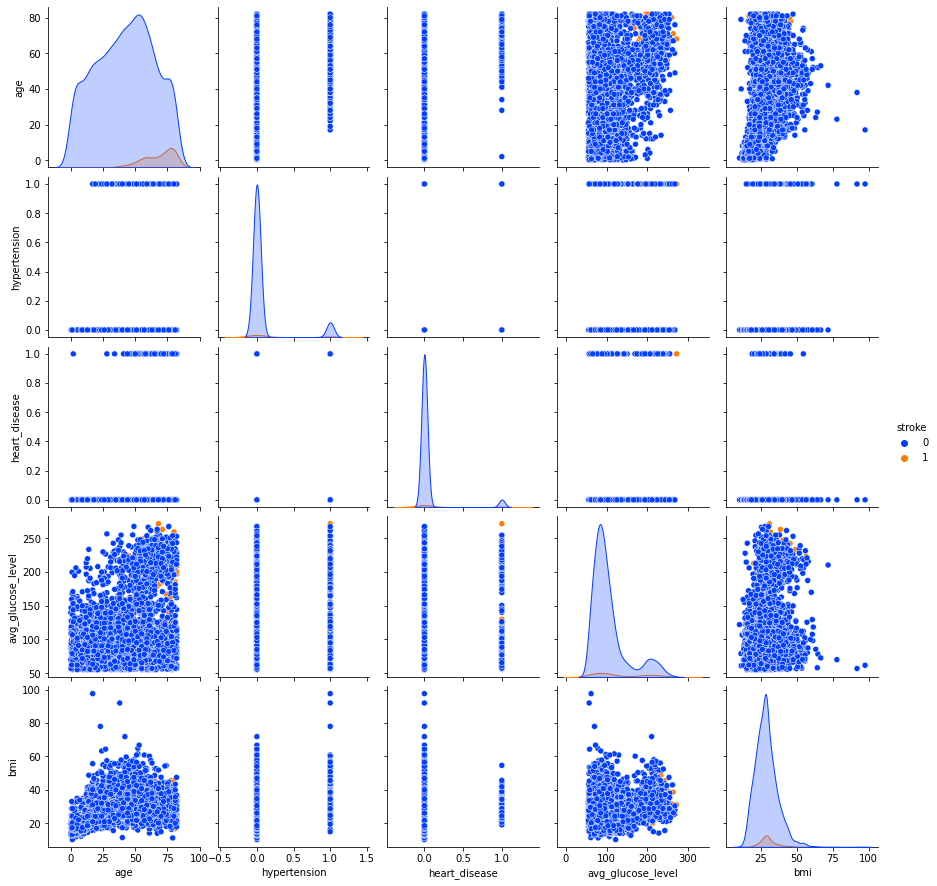

In [ ]:
#The big picture of the dataset
import seaborn as sns
sns.pairplot(data=dataset,hue='stroke',palette='bright')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Import label encoder 
from sklearn.preprocessing import LabelEncoder

# label_encoder object knows how to understand word labels 
label_encoder = LabelEncoder()
# Encode labels in columns
dataset['gender']= label_encoder.fit_transform(dataset['gender'])
dataset['ever_married']= label_encoder.fit_transform(dataset['ever_married']) 
dataset['work_type']= label_encoder.fit_transform(dataset['work_type']) 
dataset['Residence_type']= label_encoder.fit_transform(dataset['Residence_type'])
dataset['smoking_status']= label_encoder.fit_transform(dataset['smoking_status'])   
print(dataset.head())

   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               2       1  


In [ ]:
#Separate dataset into features and target value
X = dataset.drop(['stroke'],axis=1)
Y = dataset.iloc[:, -1]

In [ ]:
# Split data for training and testing 
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.2 , random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Scale the training Data
SC=MinMaxScaler()
X_train = SC.fit_transform(X_train)

0    4861
1     249
Name: stroke, dtype: int64


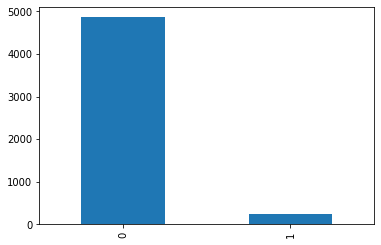

In [ ]:
#Total count of people not having stroke and people having stroke along with its graph
print(dataset['stroke'].value_counts())
dataset['stroke'].value_counts().sort_index().plot.bar()

You can see from the above graph that the data is imbalanced


Deep Neural network

Epoch 1/100
73/73 [==============================] - 1s 6ms/step - loss: 0.2003 - mae: 0.4452 - val_loss: 0.0505 - val_mae: 0.0505
Epoch 2/100
73/73 [==============================] - 0s 4ms/step - loss: 0.0957 - mae: 0.2789 - val_loss: 0.0505 - val_mae: 0.0505
Epoch 3/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0520 - mae: 0.1455 - val_loss: 0.0505 - val_mae: 0.0505
Epoch 4/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0470 - mae: 0.1025 - val_loss: 0.0505 - val_mae: 0.0505
Epoch 5/100
73/73 [==============================] - 0s 4ms/step - loss: 0.0462 - mae: 0.0901 - val_loss: 0.0505 - val_mae: 0.0505
Epoch 6/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0460 - mae: 0.0853 - val_loss: 0.0505 - val_mae: 0.0505
Epoch 7/100
73/73 [==============================] - 0s 4ms/step - loss: 0.0458 - mae: 0.0828 - val_loss: 0.0505 - val_mae: 0.0505
Epoch 8/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0456 - m

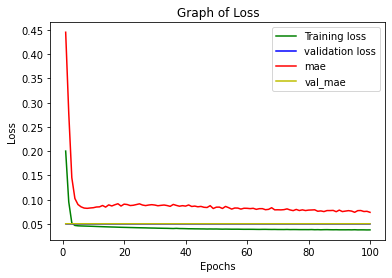

In [83]:
from tensorflow import keras
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

#training and validation set 
x1_train, x1_test, y1_train, y1_test = train_test_split(X,Y, test_size=0.5, random_state=42)
x1_train = SC.fit_transform(x1_train)

#create DNN model and compile with optimizer
model = keras.models.Sequential()
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam',
              loss= keras.losses.MeanSquaredError(),
              metrics=['mae'])
#fit the model 
history = model.fit(x1_train, y1_train, epochs=100, batch_size=35, validation_data=(x1_test, y1_test))

#get each loss value to plot on graph
loss = history.history['loss']
mae = history.history['mae']
val_loss = history.history['val_loss']
val_mae = history.history['val_mae']

#plot all values over 100 epochs
epochs = range(1,101)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.plot(epochs, mae, 'r', label='mae')
plt.plot(epochs, val_mae, 'y', label='val_mae')
plt.title('Graph of Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Visualizations of DNN 

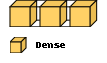

In [ ]:
from keras.utils.vis_utils import plot_model
import visualkeras
from ann_visualizer.visualize import ann_viz 

# 3 different visualizations of the DNN 
ann_viz(model, title="DNN visualiztion", view=True, filename='DNN')
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)
visualkeras.layered_view(model, legend=True)


Polynomial Classification 

In [84]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
#Scale data
sc = StandardScaler()
x_train_poly = sc.fit_transform(X_train)

#set the SVC with the polynomial kernel function and fit the data
classifier = SVC(kernel='poly', random_state= 0)
classifier.fit(x_train_poly,Y_train)

#check accuracy score based on predicted vs actual values
y_pred = classifier.predict(X_test)
accuracy_score(Y_test,y_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9285714285714286

Random Forest Model(Random forest Classifier)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE 
oversample = RandomOverSampler(sampling_strategy='minority') #As we saw above the data was imbalanced, so to balance it, we are using oversampling
X=dataset.drop(['stroke'],axis=1)
Y=dataset['stroke']
X_oversample, y_oversample = oversample.fit_resample(X, Y)
oversample=SMOTE() #SMOTE is Synthetic Minority Oversampling technique(we are oversampling the minority that is Stroke(value=1))
X_train,Y_train=oversample.fit_resample(X,Y.ravel()) #converting y to 1D array

In [79]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
random_forest = RandomForestClassifier(n_estimators = 100, criterion= 'entropy', random_state = 0)
random_forest.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [82]:
#Accuracy Score
from sklearn.metrics import accuracy_score
Y_train_rf = random_forest.predict(X_train)
accuracy_train_rf = accuracy_score(Y_train, Y_train_rf)

y_pred_test_rf = random_forest.predict(X_test)
accuracy_test_rf = accuracy_score(Y_test, y_pred_test_rf)
print(accuracy_train_rf)
print(accuracy_test_rf)



1.0
1.0


Random Forest Classifier Graph: 